In [4]:
import torch as th
import numpy as np
from functions_ngates_v2 import calc_variance_pure, calc_variance_ng_cnot_batched, _kron_batched
from functions_ngates_v1 import calc_variance_ng_crx_batched

ModuleNotFoundError: No module named 'functions_ngates_v2'

(<Figure size 1100x700 with 1 Axes>, <Axes: >)

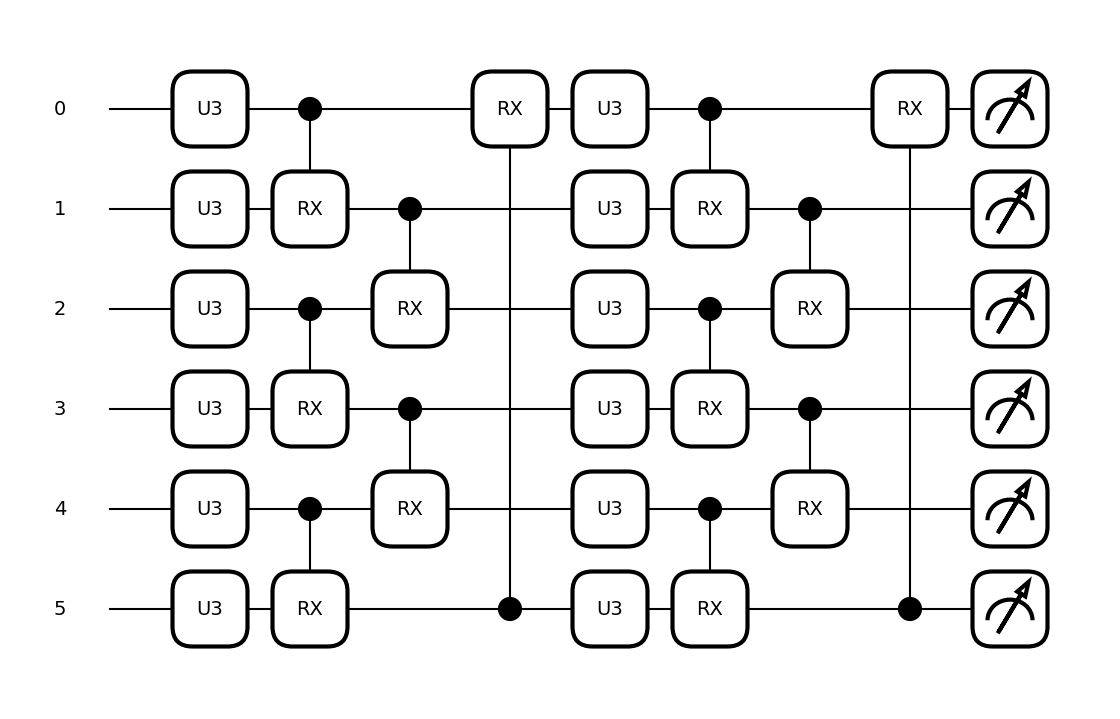

In [8]:
import pennylane as qml
from pennylane import numpy as np

def hardware_efficient_ansatz_1(params, theta, wires):
    """
    A hardware-efficient ansatz with layers of U3 gates and staggered CRX gates.

    Args:
        params (array): A NumPy array of shape (num_layers, num_qubits, 3) for the U3 gates.
        theta (float): The rotation angle for the CRX entangling gates.
        wires (list): A list of wire indices.
    """
    num_layers = params.shape[0]
    num_qubits = len(wires)

    for layer in range(num_layers):
        # Layer of universal single-qubit rotation gates
        for i in range(num_qubits):
            qml.U3(params[layer, i, 0], params[layer, i, 1], params[layer, i, 2], wires=i)

        # Layer of entangling gates (staggered pattern)
        # First block: entangles (0,1), (2,3), ...
        for i in range(0, num_qubits - 1, 2):
            qml.CRX(theta, wires=[wires[i], wires[i+1]])
            
        # Second block: entangles (1,2), (3,4), ...
        # This creates a "brick-like" or "staircase" structure
        for i in range(1, num_qubits, 2):
            qml.CRX(theta, wires=[wires[i], wires[(i+1) % num_qubits]])


# --- Circuit Parameters ---
num_qubits = 6
num_layers = 2
wires = list(range(num_qubits))

# --- Device Definition ---
# We use 'default.qubit' for simulation and drawing.
dev = qml.device("default.qubit", wires=num_qubits)

# --- QNode Definition ---
# A QNode is a quantum function that can be executed on a device.
@qml.qnode(dev)
def circuit(params, theta):
        hardware_efficient_ansatz_1(params, theta, wires=wires)
        # We don't need to return anything specific for drawing the circuit.
        # Returning the state is a common practice.
        return qml.state()

# --- Parameter Initialization ---
# Create dummy parameters with the correct shape to draw the circuit.
# The actual values don't matter for visualization.
np.random.seed(42) # for reproducibility
params = np.random.uniform(0, 2 * np.pi, (num_layers, num_qubits, 3))
theta = np.pi / 2 # A sample value for the CRX angle

# --- Draw the Circuit ---
# Use qml.draw to generate a string representation of the circuit.
qml.draw(circuit)(params, theta)

qml.draw_mpl(circuit)(params, theta)


In [13]:
f = lambda x,y : (x+1)%Lx*Ly + (y+1)%Ly
f(0,0)

6

In [57]:
L = 1
N = 2

batch_size = 1

phi = th.randn(size=(batch_size, N-1, L), dtype=th.float64) * np.pi/4

cnot = th.zeros((batch_size, N-1, L, 4, 4), dtype=th.complex128,)
cnot[:,:,:,0,0] = 1
cnot[:,:,:,1,1] = 1
cnot[:,:,:,2,2] = (1 + th.exp(1j * 4 * phi))/2
cnot[:,:,:,3,3] = (1 + th.exp(1j * 4 * phi))/2
cnot[:,:,:,2,3] = (1 - th.exp(1j * 4 * phi))/2
cnot[:,:,:,3,2] = (1 - th.exp(1j * 4 * phi))/2

cnot

tensor([[[[[1.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
           [0.0000+0.0000j, 1.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
           [0.0000+0.0000j, 0.0000+0.0000j, 0.0169+0.1290j, 0.9831-0.1290j],
           [0.0000+0.0000j, 0.0000+0.0000j, 0.9831-0.1290j, 0.0169+0.1290j]]]]],
       dtype=torch.complex128)

In [60]:
cnot[:,0,0] @ cnot[:,0,0].conj().transpose(-1,-2)

tensor([[[ 1.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
         [ 0.0000e+00+0.j,  1.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
         [ 0.0000e+00+0.j,  0.0000e+00+0.j,  1.0000e+00+0.j, -4.8572e-17+0.j],
         [ 0.0000e+00+0.j,  0.0000e+00+0.j, -4.8572e-17+0.j,  1.0000e+00+0.j]]],
       dtype=torch.complex128)

In [22]:
cnot = th.zeros((batch_size, N-1, L, 4, 4), dtype=th.complex128,)
cnot[:,:,:,0,0] = 1
cnot[:,:,:,1,1] = 1
cnot[:,:,:,2,2] = (1 + th.exp(1j * 4 * phi))/2
cnot[:,:,:,3,3] = (1 + th.exp(1j * 4 * phi))/2
cnot[:,:,:,2,3] = (1 - th.exp(1j * 4 * phi))/2
cnot[:,:,:,3,2] = (1 - th.exp(1j * 4 * phi))/2
np.round(cnot.numpy())

array([[[[[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.-0.j],
          [0.+0.j, 0.+0.j, 0.-0.j, 1.+0.j]]]],



       [[[[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
          [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j]]]]])

In [4]:
calc_variance_ng_cnot_batched(4,10,n_sim=1000, n_sim_noise=500).shape

torch.Size([1000, 500])

In [6]:
calc_variance_ng_crx_batched(4,10,np.pi/2,n_sim=1000,n_sim_noise=500).shape

torch.Size([1000, 500])

In [ ]:
import torch.nn as nn

class circuit(nn.Module):
    def __init__(self, phi_init=phi):
        super().__init__()
        self.phi = nn.Parameter(torch.tensor(phi_init, dtype=torch.float64))

    def forward(self):
        # Example: apply Rx[0] and Ry[0] using the optimizable phi
        rx_mat = Rx[0](self.phi)
        ry_mat = Ry[0](self.phi)
        return rx_mat @ ry_mat

# Instantiate the module
opt_module = MyOptimModule()